# FBE551 HW3

## Team Member Names:  
1. Kartik Balodi  
2. Abdullah Alotaibi  
3. Kushik Naveen  
4. Tanay Shah  
5. Judith Guyandi

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

### Question 1
**The russell_adjclose.csv file contains adjusted closing prices for these four ETFs:**
- **IWF large cap growth stocks**
- **IWD large cap value stocks**
- **IWO small cap growth stocks**
- **IWN small cap value stocks**  
  
**Using ^IRX.csv, begin by computing excess returns on all four ETFs following the procedure used in Question 2 of Problem Set 2. (You may want to review my solutions.)**


In [2]:
russell_df = pd.read_csv('russell_adjclose.csv',parse_dates=[0],index_col=[0])
russell_df

,IWF,IWD,IWO,IWN
Date,,,,
2000-07-28,64.122047,32.991676,65.656059,22.564299
2000-07-31,65.001648,33.286224,66.335213,22.701979
2000-08-01,65.319260,33.561806,65.683258,22.929138
2000-08-02,64.622940,33.903889,65.995628,23.056480
2000-08-03,65.453621,33.989399,65.221443,23.101213
...,...,...,...,...
2022-09-19,229.270004,148.979996,222.789993,142.970001
2022-09-20,227.119995,146.830002,219.539993,141.070007
2022-09-21,223.179993,144.389999,216.660004,138.970001


In [3]:
irx_df = pd.read_csv('^IRX.csv',parse_dates=[0],index_col=[0])
irx_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1960-01-04,4.520,4.520,4.520,4.520,4.520,0.0
1960-01-05,4.550,4.550,4.550,4.550,4.550,0.0
1960-01-06,4.680,4.680,4.680,4.680,4.680,0.0
1960-01-07,4.630,4.630,4.630,4.630,4.630,0.0
1960-01-08,4.590,4.590,4.590,4.590,4.590,0.0
...,...,...,...,...,...,...
2022-07-21,2.413,2.415,2.333,2.360,2.360,0.0
2022-07-22,2.355,2.375,2.303,2.355,2.355,0.0
2022-07-24,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
russell_df['Tbill yield'] = irx_df['Close']
russell_df.isnull().sum() # checking for null values

IWF             0
IWD             0
IWO             0
IWN             0
Tbill yield    49
dtype: int64

In [5]:
russell_df['Tbill yield filled'] = russell_df['Tbill yield'].fillna(method='ffill')
russell_df.isnull().sum()

IWF                    0
IWD                    0
IWO                    0
IWN                    0
Tbill yield           49
Tbill yield filled     0
dtype: int64

_I use the df.index.dayofweek to map each date to Monday = 0 , ... , Sunday = 6. Then, subtract the value for day n from day n-1 and mod the result to give N(t). Here, I've assumed that there is no occasion where the trading day stops for longer than 7 days i.e. N(t)<7, otherwise I'd need a different method to account for the longer gap between trading days._

In [6]:
russell_df['Day of week'] = russell_df.index.dayofweek
russell_df['N(t)'] = (russell_df['Day of week']-russell_df['Day of week'].shift()).mod(7)
russell_df["RTB(t)"] = (russell_df['Tbill yield filled'].shift())*russell_df['N(t)']/36500
russell_df

,IWF,IWD,IWO,IWN,Tbill yield,Tbill yield filled,Day of week,N(t),RTB(t)
Date,,,,,,,,,
2000-07-28,64.122047,32.991676,65.656059,22.564299,6.00,6.000,4,NaN,NaN
2000-07-31,65.001648,33.286224,66.335213,22.701979,6.02,6.020,0,3.0,0.000493
2000-08-01,65.319260,33.561806,65.683258,22.929138,6.06,6.060,1,1.0,0.000165
2000-08-02,64.622940,33.903889,65.995628,23.056480,6.05,6.050,2,1.0,0.000166
2000-08-03,65.453621,33.989399,65.221443,23.101213,6.04,6.040,3,1.0,0.000166
...,...,...,...,...,...,...,...,...,...
2022-09-19,229.270004,148.979996,222.789993,142.970001,NaN,2.475,0,3.0,0.000203
2022-09-20,227.119995,146.830002,219.539993,141.070007,NaN,2.475,1,1.0,0.000068
2022-09-21,223.179993,144.389999,216.660004,138.970001,NaN,2.475,2,1.0,0.000068


In [7]:
russell_df['E_Ret IWF'] = russell_df['IWF'].pct_change() - russell_df['RTB(t)']
russell_df['E_Ret IWD'] = russell_df['IWD'].pct_change() - russell_df['RTB(t)']
russell_df['E_Ret IWO'] = russell_df['IWO'].pct_change() - russell_df['RTB(t)']
russell_df['E_Ret IWN'] = russell_df['IWN'].pct_change() - russell_df['RTB(t)']
russell_df

,IWF,IWD,IWO,IWN,Tbill yield,Tbill yield filled,Day of week,N(t),RTB(t),E_Ret IWF,E_Ret IWD,E_Ret IWO,E_Ret IWN
Date,,,,,,,,,,,,,
2000-07-28,64.122047,32.991676,65.656059,22.564299,6.00,6.000,4,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-31,65.001648,33.286224,66.335213,22.701979,6.02,6.020,0,3.0,0.000493,0.013224,0.008435,0.009851,0.005609
2000-08-01,65.319260,33.561806,65.683258,22.929138,6.06,6.060,1,1.0,0.000165,0.004721,0.008114,-0.009993,0.009841
2000-08-02,64.622940,33.903889,65.995628,23.056480,6.05,6.050,2,1.0,0.000166,-0.010826,0.010027,0.004590,0.005388
2000-08-03,65.453621,33.989399,65.221443,23.101213,6.04,6.040,3,1.0,0.000166,0.012689,0.002356,-0.011897,0.001774
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-19,229.270004,148.979996,222.789993,142.970001,NaN,2.475,0,3.0,0.000203,0.008197,0.006214,0.006985,0.010900
2022-09-20,227.119995,146.830002,219.539993,141.070007,NaN,2.475,1,1.0,0.000068,-0.009445,-0.014499,-0.014656,-0.013357
2022-09-21,223.179993,144.389999,216.660004,138.970001,NaN,2.475,2,1.0,0.000068,-0.017415,-0.016686,-0.013186,-0.014954


**Now consider a strategy in which you allocate 25% of your portfolio to each ETF if it’s lagged adjusted closing price is above its 200-day moving average. If below, that 25% gets allocated to cash. Note that cash earns an excess rate of return of zero.**

In [8]:
#drop redundant columns for future work for a cleaner DataFrame
russell_df2 = russell_df.drop(['Tbill yield','Tbill yield filled','Day of week','N(t)','RTB(t)'],axis=1)

#calculate moving averages of each ETF
russell_df2['ma200 IWF'] = russell_df2['IWF'].rolling(200).mean()
russell_df2['ma200 IWD'] = russell_df2['IWD'].rolling(200).mean()
russell_df2['ma200 IWO'] = russell_df2['IWO'].rolling(200).mean()
russell_df2['ma200 IWN'] = russell_df2['IWN'].rolling(200).mean()
russell_df2

,IWF,IWD,IWO,IWN,E_Ret IWF,E_Ret IWD,E_Ret IWO,E_Ret IWN,ma200 IWF,ma200 IWD,ma200 IWO,ma200 IWN
Date,,,,,,,,,,,,
2000-07-28,64.122047,32.991676,65.656059,22.564299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-31,65.001648,33.286224,66.335213,22.701979,0.013224,0.008435,0.009851,0.005609,NaN,NaN,NaN,NaN
2000-08-01,65.319260,33.561806,65.683258,22.929138,0.004721,0.008114,-0.009993,0.009841,NaN,NaN,NaN,NaN
2000-08-02,64.622940,33.903889,65.995628,23.056480,-0.010826,0.010027,0.004590,0.005388,NaN,NaN,NaN,NaN
2000-08-03,65.453621,33.989399,65.221443,23.101213,0.012689,0.002356,-0.011897,0.001774,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-19,229.270004,148.979996,222.789993,142.970001,0.008197,0.006214,0.006985,0.010900,255.761911,157.726393,241.229203,152.322035
2022-09-20,227.119995,146.830002,219.539993,141.070007,-0.009445,-0.014499,-0.014656,-0.013357,255.416202,157.668065,240.874709,152.227072
2022-09-21,223.179993,144.389999,216.660004,138.970001,-0.017415,-0.016686,-0.013186,-0.014954,255.075533,157.599462,240.545049,152.131534


**What are the mean, standard deviation, and annualized Sharpe ratio of this portfolio? (Assume 264 days in a year to annualize the Sharpe ratio.) Compare these statistics to the strategy that always puts 25% in each of the four ETFs.**

In [9]:
#initialize to 0, i.e. cash earns an excess rate of return of zero
russell_df2[['lag_strat IWF','lag_strat IWD','lag_strat IWO','lag_strat IWN']] = 0

#note the .shift() use to account for **lagged adjust closing price** 
russell_df2.loc[ russell_df2['IWF'].shift() > russell_df2['ma200 IWF'], 'lag_strat IWF'] = russell_df2['E_Ret IWF']
russell_df2.loc[ russell_df2['IWD'].shift() > russell_df2['ma200 IWD'], 'lag_strat IWD'] = russell_df2['E_Ret IWD']
russell_df2.loc[ russell_df2['IWO'].shift() > russell_df2['ma200 IWO'], 'lag_strat IWO'] = russell_df2['E_Ret IWO']
russell_df2.loc[ russell_df2['IWN'].shift() > russell_df2['ma200 IWN'], 'lag_strat IWN'] = russell_df2['E_Ret IWN']

to_sum = russell_df2[['lag_strat IWF','lag_strat IWD','lag_strat IWO','lag_strat IWN']]
#note the divide by 4 since we allocate 25% into each strategy, assuming rebalancing/arithmetic mean approach
russell_df2['lag_strat e_ret'] = (to_sum.sum(axis=1))/4

to_sum = russell_df[['E_Ret IWF','E_Ret IWD','E_Ret IWO','E_Ret IWN']]
#note the divide by 4 since we allocate 25% into each strategy, assuming rebalancing/arithmetic mean approach
russell_df2['vanilla e_ret'] = (to_sum.sum(axis=1))/4

In [10]:
print("\nMoving Average Strategy")
print("Daily Mean:", russell_df2['lag_strat e_ret'].mean())
print("Daily Standard Deviation:", russell_df2['lag_strat e_ret'].std())
print("Annualized Sharpe Ratio:", 
      str((264**.5) * russell_df2['lag_strat e_ret'].mean()/russell_df2['lag_strat e_ret'].std()) )

print("\nVanilla Strategy")
print("Daily Mean:", russell_df2['vanilla e_ret'].mean())
print("Daily Standard Deviation:", russell_df2['vanilla e_ret'].std())
print("Annualized Sharpe Ratio:", 
      str((264**.5) * russell_df2['vanilla e_ret'].mean()/russell_df2['vanilla e_ret'].std()) )


Moving Average Strategy
Daily Mean: 0.00021629504005669844
Daily Standard Deviation: 0.007203861397744056
Annualized Sharpe Ratio: 0.4878464798623607

Vanilla Strategy
Daily Mean: 0.00029844547210406476
Daily Standard Deviation: 0.013483730415626775
Annualized Sharpe Ratio: 0.35963081466731156


### Question 2
**Using the SPY.csv and ^IRX.csv files located in the problem sets folder, implement a managed volatility strategy similar to that described in the PIMCO research note.  
Begin by computing excess returns on SPY, again following the procedure used in Question 2 of Problem Set 2.**

In [11]:
spy_df = pd.read_csv("SPY.csv", parse_dates=[0],index_col=[0])
spy_df['Tbill yield'] = irx_df['Close']
spy_df['Tbill yield filled'] = spy_df['Tbill yield'].fillna(method='ffill')
spy_df.isnull().sum()

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
Tbill yield           22
Tbill yield filled     0
dtype: int64

In [12]:
spy_df['Day of week'] = spy_df.index.dayofweek
spy_df['N(t)'] = (spy_df['Day of week']-spy_df['Day of week'].shift()).mod(7)
spy_df["RTB(t)"] = (spy_df['Tbill yield filled'].shift())*spy_df['N(t)']/36500

spy_df['E_Ret SPY'] = spy_df['Adj Close'].pct_change() - spy_df['RTB(t)']
spy_df

,Open,High,Low,Close,Adj Close,Volume,Tbill yield,Tbill yield filled,Day of week,N(t),RTB(t),E_Ret SPY
Date,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.438095,1003200,2.900,2.900,4,NaN,NaN,NaN
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.619024,480500,2.900,2.900,0,3.0,0.000238,0.006874
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.673296,201300,2.960,2.960,1,1.0,0.000079,0.002039
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.944683,529400,2.930,2.930,2,1.0,0.000081,0.010490
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.053244,531500,2.900,2.900,3,1.0,0.000080,0.004104
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-20,392.470001,396.260010,391.029999,394.769989,394.769989,71843800,2.378,2.378,2,1.0,0.000067,0.006306
2022-07-21,394.160004,398.839996,391.630005,398.790009,398.790009,64903900,2.360,2.360,3,1.0,0.000065,0.010118
2022-07-22,398.920013,400.179993,392.750000,395.089996,395.089996,72130300,2.355,2.355,4,1.0,0.000065,-0.009343


**Compute 22-day rolling standard deviations of the excess returns. The weight in SPY on day t should be equal to .01/SD(t-1), where SD(t-1) is the 22-day rolling standard deviation as of date t-1.**

In [13]:
#removing redundant columns
spy = spy_df.drop(['Open','High','Low','Close','Volume','Tbill yield','Tbill yield filled',
                   'Day of week','N(t)'],axis=1)
spy['mstd SPY'] = spy['E_Ret SPY'].rolling(22).std()

#note that we use shift() in order to accurate simulate rolling standard deviation as of date t-1
spy['weight mstd_strat'] = 0.01/(spy['mstd SPY'].shift())
spy['E_Ret mstd_strat'] = spy['E_Ret SPY']*spy['weight mstd_strat']
spy

,Adj Close,RTB(t),E_Ret SPY,mstd SPY,weight mstd_strat,E_Ret mstd_strat
Date,,,,,,
1993-01-29,25.438095,NaN,NaN,NaN,NaN,NaN
1993-02-01,25.619024,0.000238,0.006874,NaN,NaN,NaN
1993-02-02,25.673296,0.000079,0.002039,NaN,NaN,NaN
1993-02-03,25.944683,0.000081,0.010490,NaN,NaN,NaN
1993-02-04,26.053244,0.000080,0.004104,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-07-20,394.769989,0.000067,0.006306,0.013373,0.646467,0.004077
2022-07-21,398.790009,0.000065,0.010118,0.013440,0.747801,0.007566
2022-07-22,395.089996,0.000065,-0.009343,0.012858,0.744060,-0.006952


**Compare the mean and standard deviation of this portfolio to a buy-and-hold position in SPY.**

In [14]:
print('\nMoving Std (22-days) Strategy in SPY')
print('Mean:', spy['E_Ret mstd_strat'].mean())
print('Standard Deviation:', spy['E_Ret mstd_strat'].std())
# print('Sharpe ratio:', str(spy['E_Ret mstd_strat'].mean()/spy['E_Ret mstd_strat'].std()))

print('\nBuy-and-Hold position in SPY')
print('Mean:', spy['E_Ret SPY'].mean())
print('Standard Deviation:', spy['E_Ret SPY'].std())
# print('Sharpe ratio:', str(spy['E_Ret SPY'].mean()/spy['E_Ret SPY'].std()))


Moving Std (22-days) Strategy in SPY
Mean: 0.00038807721284739684
Standard Deviation: 0.011065229087320166

Buy-and-Hold position in SPY
Mean: 0.0003509292710718689
Standard Deviation: 0.011871893439694556


**Similar in spirit to Exhibit 3 of the PIMCO note, plot 264-day rolling standard deviations of the portfolio and of SPY.**

In [15]:
spy2 = spy[['E_Ret mstd_strat','E_Ret SPY']]
spy2

,E_Ret mstd_strat,E_Ret SPY
Date,,
1993-01-29,NaN,NaN
1993-02-01,NaN,0.006874
1993-02-02,NaN,0.002039
1993-02-03,NaN,0.010490
1993-02-04,NaN,0.004104
...,...,...
2022-07-20,0.004077,0.006306
2022-07-21,0.007566,0.010118
2022-07-22,-0.006952,-0.009343


In [16]:
spy2['mstd portfolio'] = spy2['E_Ret mstd_strat'].rolling(264).std()
spy2['mstd buy&hold'] = spy2['E_Ret SPY'].rolling(264).std()

C:\Users\karti\AppData\Local\Temp\ipykernel_24880\1219695696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy2['mstd portfolio'] = spy2['E_Ret mstd_strat'].rolling(264).std()
C:\Users\karti\AppData\Local\Temp\ipykernel_24880\1219695696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy2['mstd buy&hold'] = spy2['E_Ret SPY'].rolling(264).std()


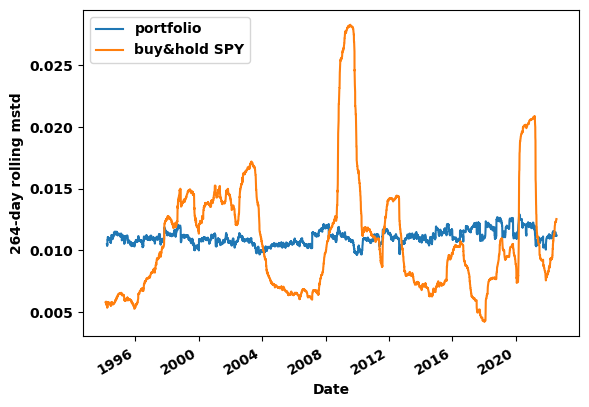

In [17]:
spy2['mstd portfolio'].plot(label='portfolio')
spy2['mstd buy&hold'].plot(label='buy&hold SPY')
plt.ylabel('264-day rolling mstd')
plt.legend(loc=2)
plt.show()

### Question 3
**Data for this question is from the Monthly tab of the PredictorData2021.xlsx file, which is in same folder as this file. It was downloaded from Amit Goyal’s website and is an updated version of the data Goyal used in his 2011 paper with Ivo Welch on return predictability. You can read in this data using pd.read_excel.**

In [18]:
predictor_data = pd.read_excel('PredictorData2021.xlsx')
predictor_data

C:\Users\karti\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
0,187101,4.44,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,4.50,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187103,4.61,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187104,4.74,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187105,4.86,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,202108,4522.68,58.791336,169.833333,0.184756,0.0005,0.0255,0.0324,0.0128,0.014846,0.000000,0.002066,-0.0035,-0.0045,0.000602,NaN,0.030600,0.029205
1808,202109,4307.54,59.254483,175.370000,0.193036,0.0004,0.0253,0.0323,0.0137,0.015598,0.000000,0.002716,-0.0250,-0.0194,0.001393,NaN,-0.046076,-0.047152
1809,202110,4605.38,59.635361,182.860000,0.182389,0.0005,0.0268,0.0335,0.0158,0.013368,0.000000,0.008308,0.0051,0.0159,0.001151,NaN,0.070510,0.069627
1810,202111,4567.00,60.016239,190.350000,0.189455,0.0005,0.0262,0.0328,0.0156,0.015640,0.000100,0.004913,0.0210,0.0094,0.001327,NaN,-0.007256,-0.008665


**Throw out all data before 1950.**

In [19]:
#use to_datetime method to parse raw data into datetime object for manipulation
predictor_data['Date'] = pd.to_datetime(predictor_data['yyyymm'], format='%Y%m')
#dump all dates before 1950
predictor_data = predictor_data.loc[predictor_data['Date'] >= '1950-01-01']
#set date as index and remove repeated axis yyyymm
predictor_data = predictor_data.set_index('Date')
predictor_data = predictor_data.drop(['yyyymm'],axis=1)

predictor_data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
Date,,,,,,,,,,,,,,,,,
1950-01-01,17.05,1.150000,2.336670,0.791417,0.0107,0.0257,0.0324,0.0215,0.027102,0.0009,-0.004237,-0.0061,0.0037,0.000989,0.004458,0.019703,0.018245
1950-02-01,17.22,1.160000,2.353330,0.784998,0.0112,0.0258,0.0324,0.0214,0.025492,0.0009,0.000000,0.0021,0.0007,0.000426,0.004246,0.019603,0.009975
1950-03-01,17.29,1.170000,2.370000,0.825528,0.0112,0.0258,0.0324,0.0215,0.029291,0.0010,0.004255,0.0008,0.0022,0.000624,0.004553,0.008185,0.003542
1950-04-01,18.07,1.180000,2.426670,0.796497,0.0115,0.0260,0.0323,0.0214,0.026398,0.0009,0.000000,0.0030,-0.0008,0.000714,0.004022,0.045887,0.044493
1950-05-01,18.78,1.190000,2.483330,0.761346,0.0116,0.0261,0.0325,0.0213,0.028572,0.0010,0.004237,0.0033,-0.0008,0.000641,0.003803,0.046902,0.037590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,4522.68,58.791336,169.833333,0.184756,0.0005,0.0255,0.0324,0.0128,0.014846,0.0000,0.002066,-0.0035,-0.0045,0.000602,NaN,0.030600,0.029205
2021-09-01,4307.54,59.254483,175.370000,0.193036,0.0004,0.0253,0.0323,0.0137,0.015598,0.0000,0.002716,-0.0250,-0.0194,0.001393,NaN,-0.046076,-0.047152
2021-10-01,4605.38,59.635361,182.860000,0.182389,0.0005,0.0268,0.0335,0.0158,0.013368,0.0000,0.008308,0.0051,0.0159,0.001151,NaN,0.070510,0.069627


**The worksheet contains data that can be used to construct a number of predictors. These include:**
- **The D/P ratio (column C divided by column B)**
- **The term spread (column I minus column F)**
- **The default spread (column H minus column G)**
- **Net stock issuance (column J)**  


In [20]:
predictor_data['D/P ratio'] = predictor_data['D12']/predictor_data['Index']
predictor_data['term spread'] = predictor_data['lty']-predictor_data['tbl']
predictor_data['default spread'] = predictor_data['BAA']-predictor_data['AAA']
predictor_data['net stock issuance'] = predictor_data['ntis']

**The sheet also contains market returns in column Q and risk-free returns in column K. Use them to compute the excess return on the market.**

In [21]:
predictor_data['excess mkt return'] = predictor_data['CRSP_SPvw']-predictor_data['Rfree']

#cleaning the raw DataFrame by extracting the relevant columns for subsequent tasks into a new one
regression_df = predictor_data[['excess mkt return','D/P ratio','term spread','default spread','net stock issuance']]
regression_df

,excess mkt return,D/P ratio,term spread,default spread,net stock issuance
Date,,,,,
1950-01-01,0.018803,0.067449,0.0108,0.0067,0.027102
1950-02-01,0.018703,0.067364,0.0102,0.0066,0.025492
1950-03-01,0.007185,0.067669,0.0103,0.0066,0.029291
1950-04-01,0.044987,0.065302,0.0099,0.0063,0.026398
1950-05-01,0.045902,0.063365,0.0097,0.0064,0.028572
...,...,...,...,...,...
2021-08-01,0.030600,0.012999,0.0123,0.0069,0.014846
2021-09-01,-0.046076,0.013756,0.0133,0.0070,0.015598
2021-10-01,0.070510,0.012949,0.0153,0.0067,0.013368


**Run an out-of-sample analysis of a regression that uses the four predictive variables described above. The
dependent variable is the excess market return in the next month. All regressions should use exactly 10
years of data. (Since you must lag the independent variables, you will have 119 observations in your
regression.) Your first prediction will therefore be made in December of 1959, when you will be predicting
the January 1960 return. Move the sample forward one month and repeat.** 

In [22]:
# TODO
# refer to the simple_predictability_regressions notebook if stuck on how to use for loops
# refer to volatility_data notebook for how to run OLS on multiple independent variables

**If m(t) is your return excess forecast at time t, then set your portfolio weight equal to**  
<h5><center>w(t) = min{1.5, max{0.5, 100×m(t)}}.</center></h5>  
  
**Note that the 100 is a lot different than the 8 used by Hull & Qiao. I am assuming that your market excess
return forecasts will not be annualized. So if your expected return in the next month is .01 (a 1% return in
the next month or 12% annualized), then you would put 100% of your money in the market index. Also
note that the minimum weight is 0.5, rather than -0.5, as used by H&Q.**

In [23]:
# TODO
# kind of a repitition of hw2, where we use min in drawdown calculations

**As with H&Q, assess both strategies using mean, standard deviation, and Sharpe. Report corresponding values for the strategy that simply puts 100% into the market.**

In [24]:
# TODO